# Image Color Identifier using ML
### <i>-by Vivek Kumar</i>

<ul>
  <li>This notebook utilizes the machine learning algorithm, <font color="blue"><b>KMeans</b></font>, to extract colors from a given image.</li>
  <li>The image manipulation is performed using <font color="green"><b>OpenCV2</b></font>.</li>
  <li>The major colors are identified by applying <font color="blue"><b>KMeans</b></font>.</li>
  <li>The information is visualized using <font color="red"><b>Matplotlib</b></font>.</li>
</ul>

## Libraries Required

<ul>
  <li>To begin, we import the required libraries.</li>
  <li>We use <font color="blue"><b>sklearn</b></font> for the KMeans algorithm.</li>
  <li>For plotting graphs, we utilize <font color="red"><b>matplotlib.pyplot</b></font>.</li>
  <li><font color="green"><b>numpy</b></font> is employed for working with arrays.</li>
  <li>To manipulate image data, we rely on <font color="purple"><b>cv2</b></font>.</li>
  <li>The <font color="orange"><b>collections</b></font> library is used to access the Counter function for value counting.</li>
  <li>We employ <font color="brown"><b>rgb2lab</b></font> to convert RGB values.</li>
  <li>Lastly, we utilize <font color="magenta"><b>deltaE_cie76</b></font> to calculate color similarity.</li>
</ul>

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
# from IPython.display import Image, display
from PIL import Image


%matplotlib inline

import warnings
# Suppress FutureWarning for KMeans
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)

## Checking demo image

<ul>
  <li>To start, we read a sample image.</li>
  <li>We then explore the basic operations that can be performed on the image.</li>
</ul>

The type is: <class 'numpy.ndarray'>
Shape: (3781, 5671, 3)


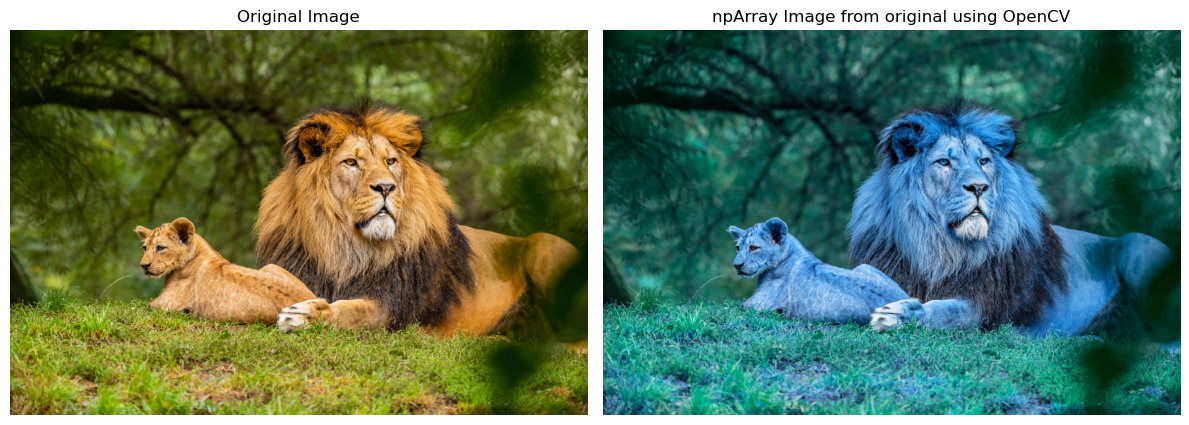

In [2]:
image = cv2.imread('demo.jpg')

# Print image type and shape
print(f"The type is: {type(image)}")
print(f"Shape: {image.shape}")

# Display images side by side with increased size
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Increase the figure size as desired
axs[1].imshow(image)
axs[1].axis('off')
axs[1].set_title('npArray Image from original using OpenCV')

# Load and display another image
image2 = Image.open('demo.jpg')
axs[0].imshow(image2)
axs[0].axis('off')
axs[0].set_title('Original Image')

plt.tight_layout()
plt.show()

<ul>
  <li>Observe that the image has different colors compared to the original image.</li>
  <li>This is because, by default, OpenCV reads the images in the color order <font color="blue"><b>BLUE</b></font><font color="GREEN"><b>GREEN</b></font><font color="RED"><b>RED</b></font>, i.e., BGR.</li>
  <li>To fix this, we need to convert the image into the color order <font color="RED"><b>RED</b></font><font color="GREEN"><b>GREEN</b></font><font color="blue"><b>BLUE</b></font>, i.e., RGB.</li>
</ul>

(-0.5, 5670.5, 3780.5, -0.5)

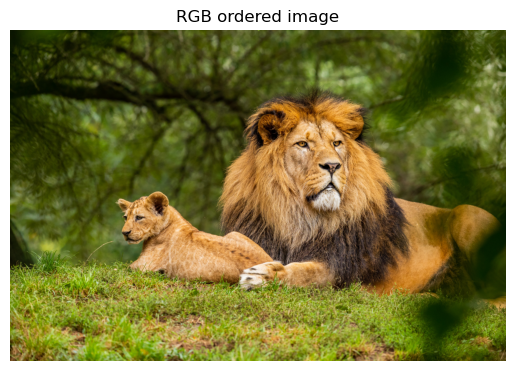

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('RGB ordered image')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

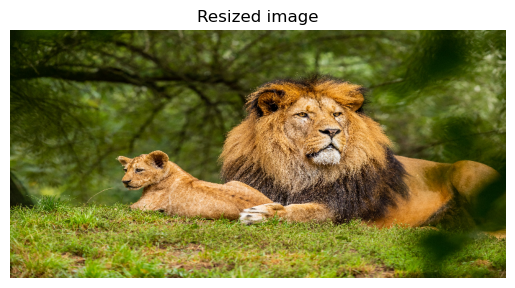

In [4]:
resized_image = cv2.resize(image, (800, 400))
plt.imshow(resized_image)
plt.title('Resized image')
plt.axis('off')

(-0.5, 5670.5, 3780.5, -0.5)

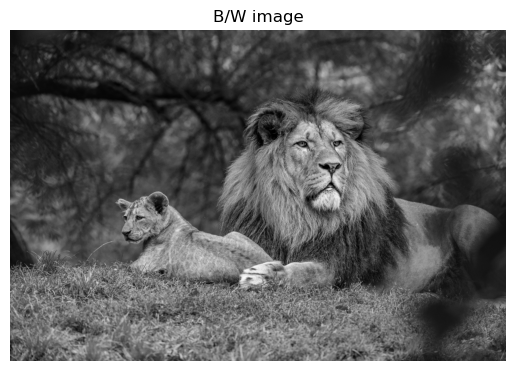

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('B/W image')
plt.axis('off')

## Color Identification


<ul>
  <li>Let's begin the process of identifying colors from an image.</li>
  <li>First, we will create a function that can provide us with the <font color="green"><b>hex values</b></font> of the colors we identify.</li>
</ul>

In [6]:
def RGB2HEX(color):
    return "#{:02X}{:02X}{:02X}".format(int(color[0]), int(color[1]), int(color[2]))

<ul>
  <li><font color="purple"><b>KMeans</b></font> expects a flattened array as input during its <font color="purple"><b>fit method</b></font>. Therefore, we need to reshape the image using <font color="blue"><b>numpy</b></font>.</li>
  <li>Next, we can apply <font color="purple"><b>KMeans</b></font> to first fit and then predict on the image to obtain the results.</li>
  <li>After that, the cluster colors are identified and arranged in the correct order.</li>
  <li>Finally, we plot the colors as a pie chart.</li>
  <li>I have combined all these steps into two methods.</li>
</ul>

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

[array([27.67187172, 36.32362392,  3.26434642]),
 array([114.15210765, 115.40623383,  38.58991316]),
 array([200.207645  , 161.46987419,  89.1745247 ]),
 array([58.80744507, 64.12799882, 10.35792614]),
 array([170.02936158, 121.75522212,  58.86854957]),
 array([228.16756697, 191.50457502, 141.85304818]),
 array([83.55754784, 87.71659818, 27.08377952]),
 array([146.96343497, 157.6070351 ,  50.10584405])]

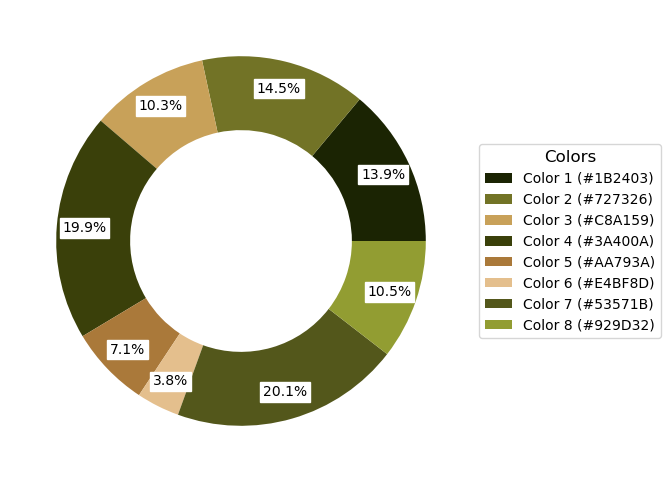

In [8]:
def get_colors(image, number_of_colors, show_chart):
    warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
    modified_image = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0] * modified_image.shape[1], 3)
    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if show_chart:
        fig, ax = plt.subplots(figsize=(8, 6))
        wedges, _, autopct_labels = ax.pie(counts.values(), colors=hex_colors, wedgeprops=dict(width=0.4),
                                           autopct='%1.1f%%', pctdistance=0.85)
        ax.set_aspect("equal")  # Ensure equal aspect ratio for a circular shape
        
        # Move the percentage labels outward and provide a suitable background
        for label in autopct_labels:
            label.set_horizontalalignment('center')
            label.set_verticalalignment('center')
            label.set_bbox(dict(facecolor='white', edgecolor='white', pad=2.0))

        # Create a color legend with formatted labels
        simplified_labels = [f"Color {i+1} ({hex_colors[i]})" for i in range(len(hex_colors))]
        legend = ax.legend(wedges, simplified_labels, title='Colors', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.setp(legend.get_title(), fontsize='large')

    return rgb_colors
get_colors(get_image('demo.jpg'), 8, True)